# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [3]:
# Load the dataset
df = pd.read_csv('Employee_data.csv')


In [4]:
# Check the first few entries
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [5]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [6]:
# Inspect the different columns in the dataset
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [10]:
# Check the summary of the dataset
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


### **1.3 Check the data type of columns**

In [11]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [12]:
# Check the number of missing values in each column
df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [13]:
# Check the percentage of missing values in each column
missing_percentage = round(100 * (df.isnull().sum() / len(df)), 2)
print(missing_percentage)

Employee ID                   0.00
Age                           0.00
Gender                        0.00
Years at Company              0.00
Job Role                      0.00
Monthly Income                0.00
Work-Life Balance             0.00
Job Satisfaction              0.00
Performance Rating            0.00
Number of Promotions          0.00
Overtime                      0.00
Distance from Home            2.56
Education Level               0.00
Marital Status                0.00
Number of Dependents          0.00
Job Level                     0.00
Company Size                  0.00
Company Tenure (In Months)    3.23
Remote Work                   0.00
Leadership Opportunities      0.00
Innovation Opportunities      0.00
Company Reputation            0.00
Employee Recognition          0.00
Attrition                     0.00
dtype: float64


2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [14]:
# Handle the missing value rows in the column
initial_rows = df.shape[0]
df.dropna(inplace=True)

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [15]:
# Check the percentage of remaining data after missing values are removed
# Check the percentage of remaining data
print(f"\nPercentage of data remaining after dropping nulls: {round(100 * (df.shape[0] / initial_rows), 2)}%")


Percentage of data remaining after dropping nulls: 94.67%


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [16]:
# Write a function to display the categorical columns with their unique values and check for redundant values
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'Gender':
['Male' 'Female']

Unique values in 'Job Role':
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']

Unique values in 'Work-Life Balance':
['Excellent' 'Poor' 'Good' 'Fair']

Unique values in 'Job Satisfaction':
['Medium' 'High' 'Very High' 'Low']

Unique values in 'Performance Rating':
['Average' 'Low' 'High' 'Below Average']

Unique values in 'Overtime':
['No' 'Yes']

Unique values in 'Education Level':
['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']

Unique values in 'Marital Status':
['Married' 'Divorced' 'Single']

Unique values in 'Job Level':
['Mid' 'Senior' 'Entry']

Unique values in 'Company Size':
['Medium' 'Small' 'Large']

Unique values in 'Remote Work':
['No' 'Yes']

Unique values in 'Leadership Opportunities':
['No' 'Yes']

Unique values in 'Innovation Opportunities':
['No' 'Yes']

Unique values in 'Company Reputation':
['Excellent' 'Fair' 'Poor' 'Good']

Unique values in 'Employee Recognition':
['Mediu

In [17]:
# Check the data
# The character â€™ appears in some values. We will replace it.
df.replace({r'[â€™]': '\''}, regex=True, inplace=True)
print("\nCorrected unique values in 'Education Level':")
print(df['Education Level'].unique())


Corrected unique values in 'Education Level':
['Associate Degree' "Master'''s Degree" "Bachelor'''s Degree"
 'High School' 'PhD']


### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [18]:
# Drop redundant columns which are not required for modelling
df.drop(['Employee ID', 'Company Tenure (In Months)'], axis=1, inplace=True)

In [19]:
# Check first few rows of data
print("\nDataFrame after dropping redundant columns:")
print(df.head())


DataFrame after dropping redundant columns:
   Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    Male                19   Education            5390   
1   59  Female                 4       Media            5534   
2   24  Female                10  Healthcare            8159   
3   36  Female                 7   Education            3989   
4   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  ...  Marital Status Number of Dependents Job Level  Company Size  \
0  

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [20]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [47]:
# Put all the feature variables in X
X = df.drop('Attrition', axis=1)
# Put the target variable in y
y = df['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [48]:
# Split the data into 70% train data and 30% validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

Training set shape: (49444, 21)
Validation set shape: (21191, 21)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
print("\nPlotting distributions of numerical columns for training data...")
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])


Plotting distributions of numerical columns for training data...


4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

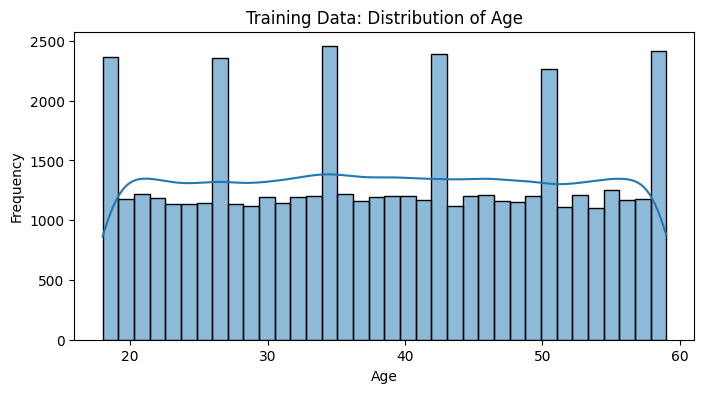

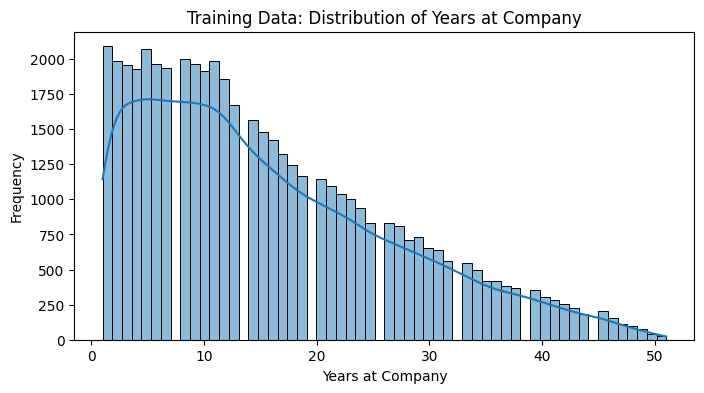

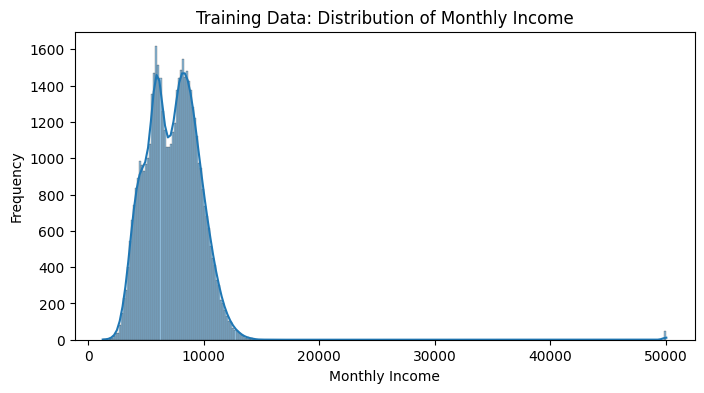

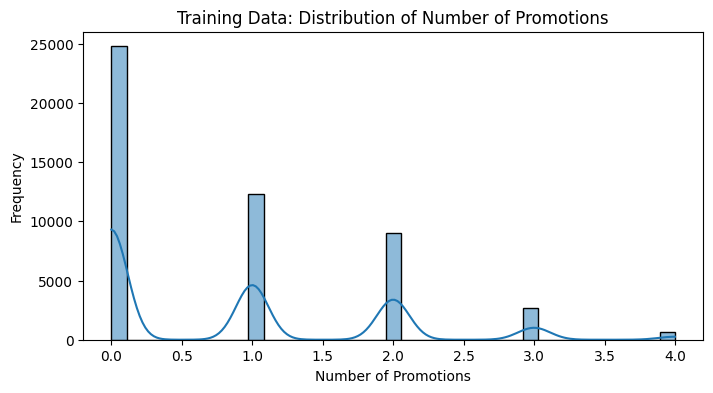

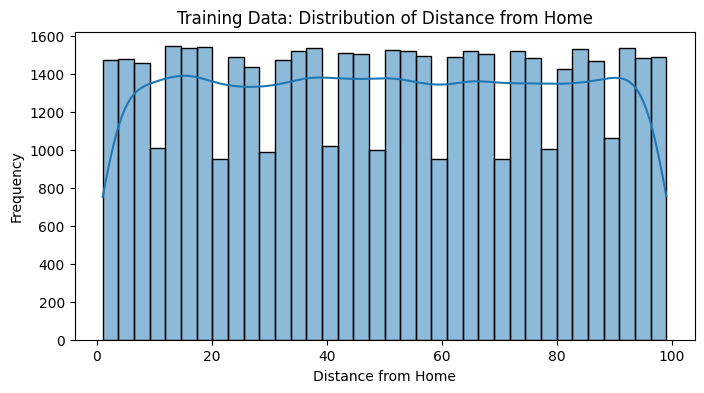

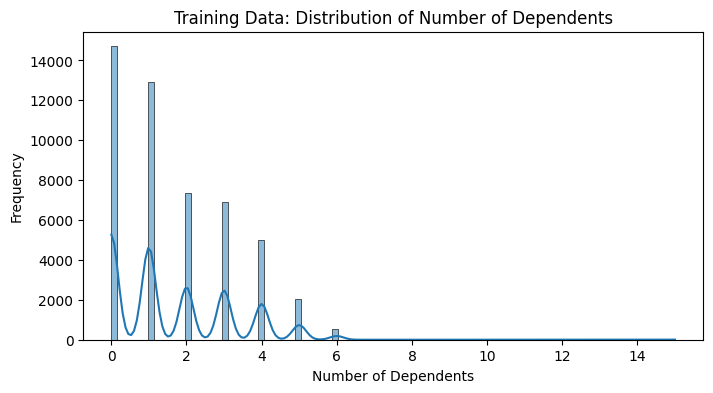

In [24]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
for col in X_train_num.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_train_num[col], kde=True)
    plt.title(f'Training Data: Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.


Plotting correlation heatmap for training data...


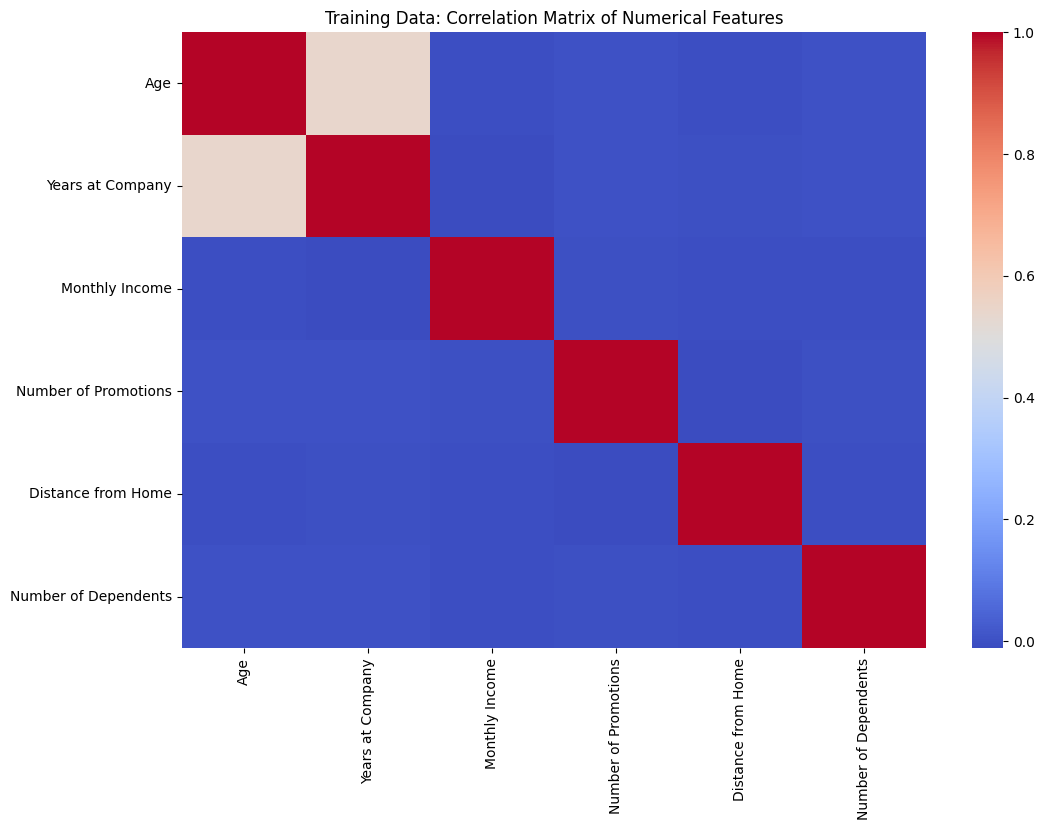

In [26]:
print("\nPlotting correlation heatmap for training data...")
plt.figure(figsize=(12, 8))
correlation_matrix = X_train_num.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Training Data: Correlation Matrix of Numerical Features')
plt.show()


### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.


Plotting class balance for training data...


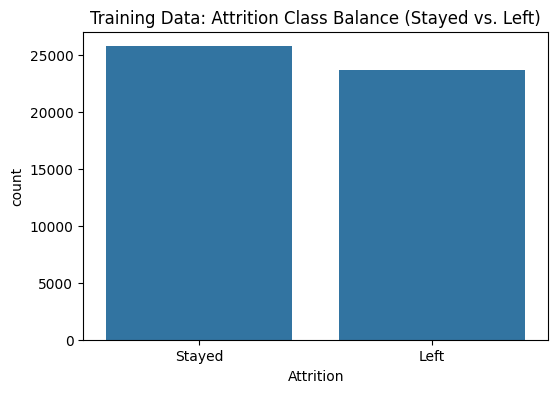

In [27]:
print("\nPlotting class balance for training data...")
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Training Data: Attrition Class Balance (Stayed vs. Left)')
plt.show()


### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.


Plotting bivariate analysis for categorical features in training data...


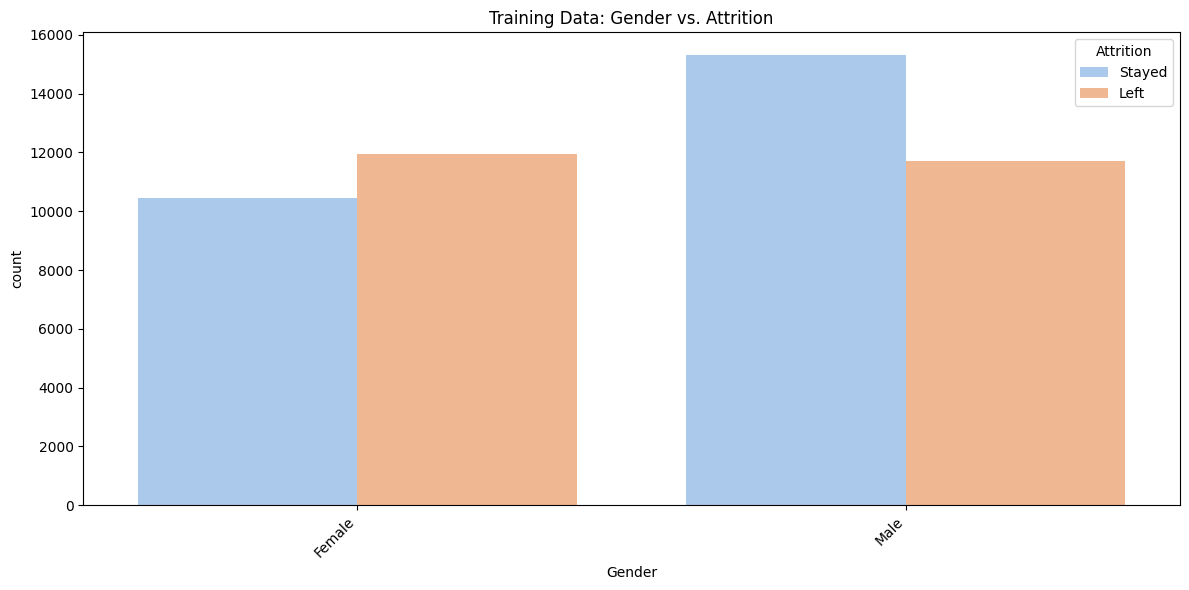

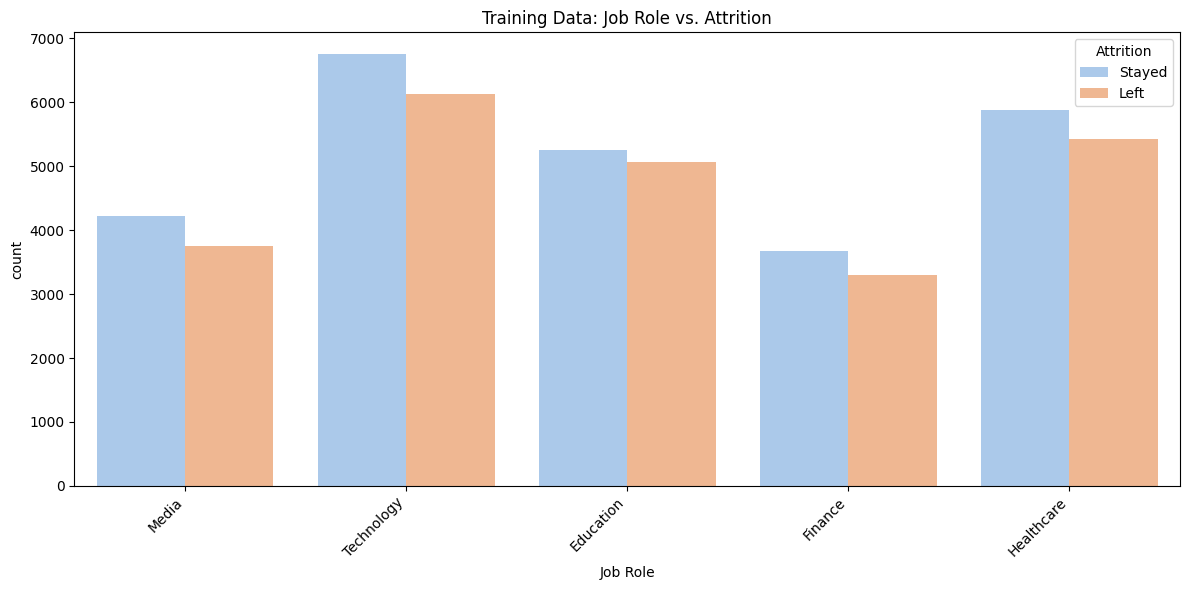

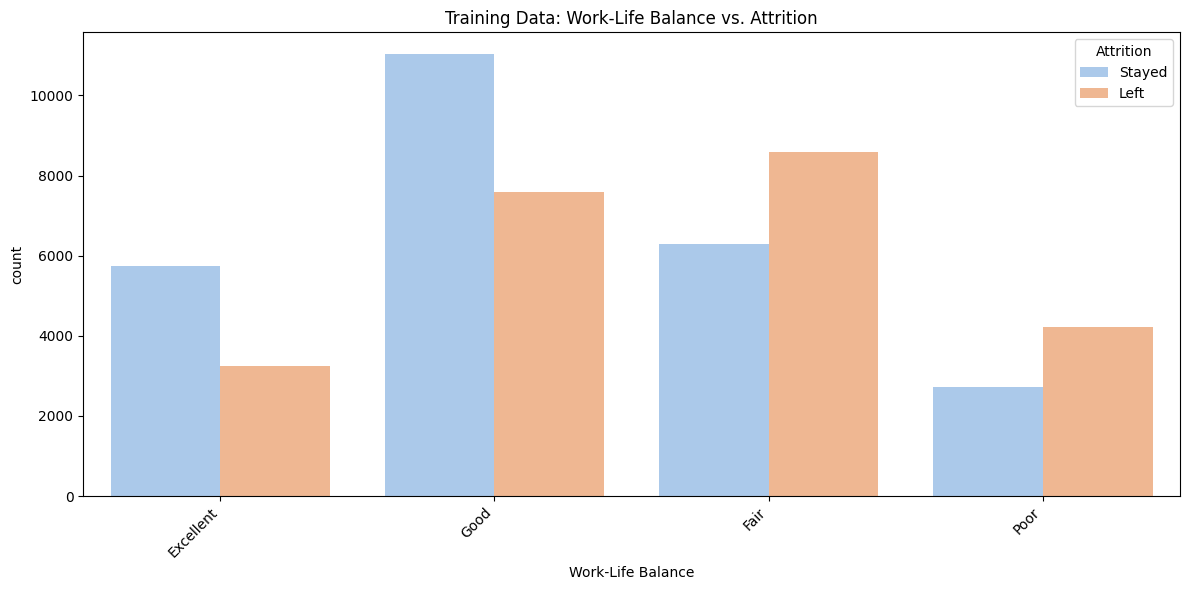

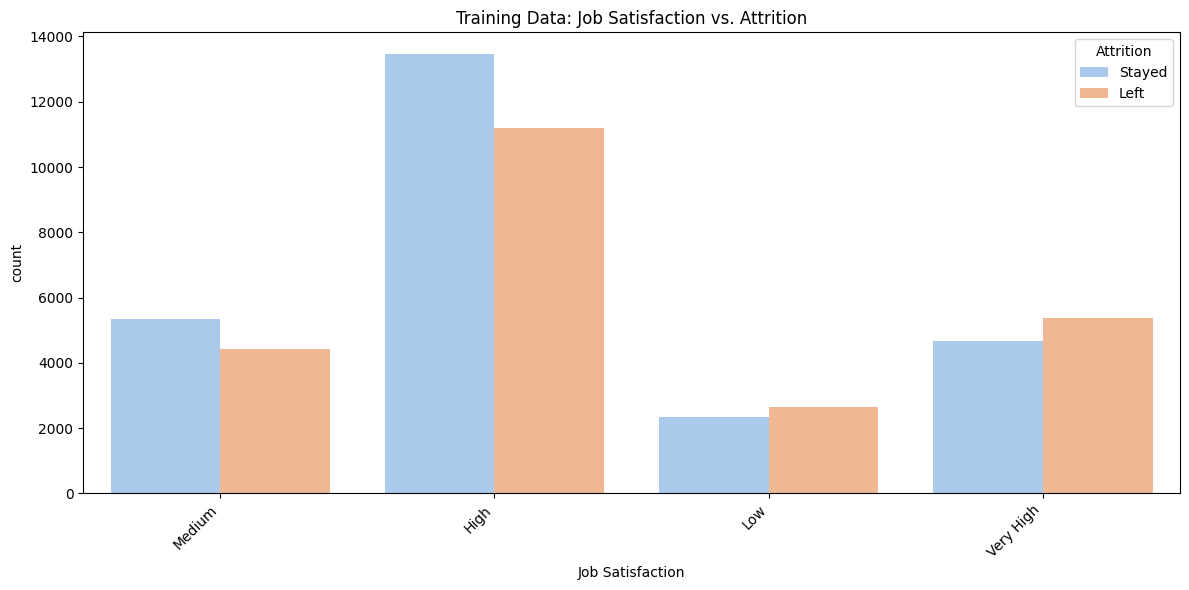

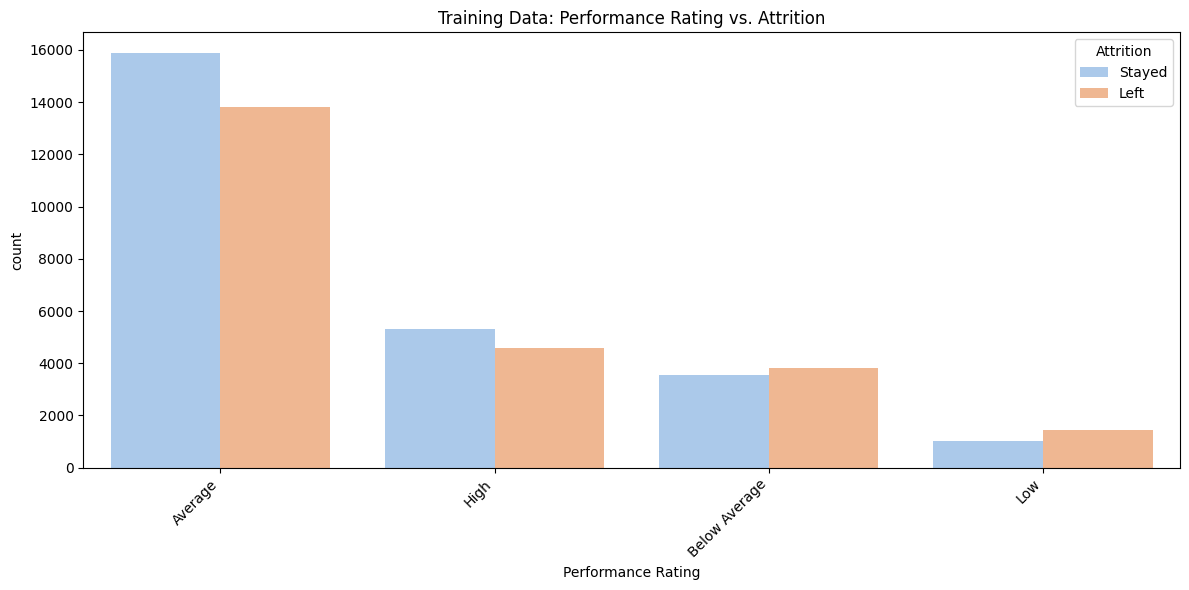

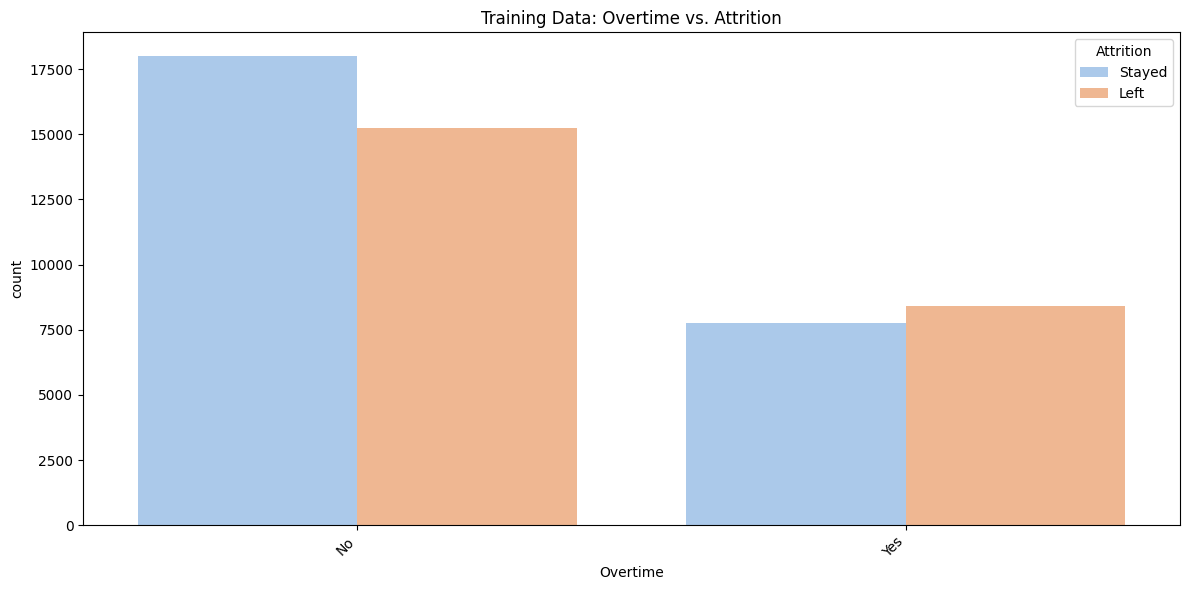

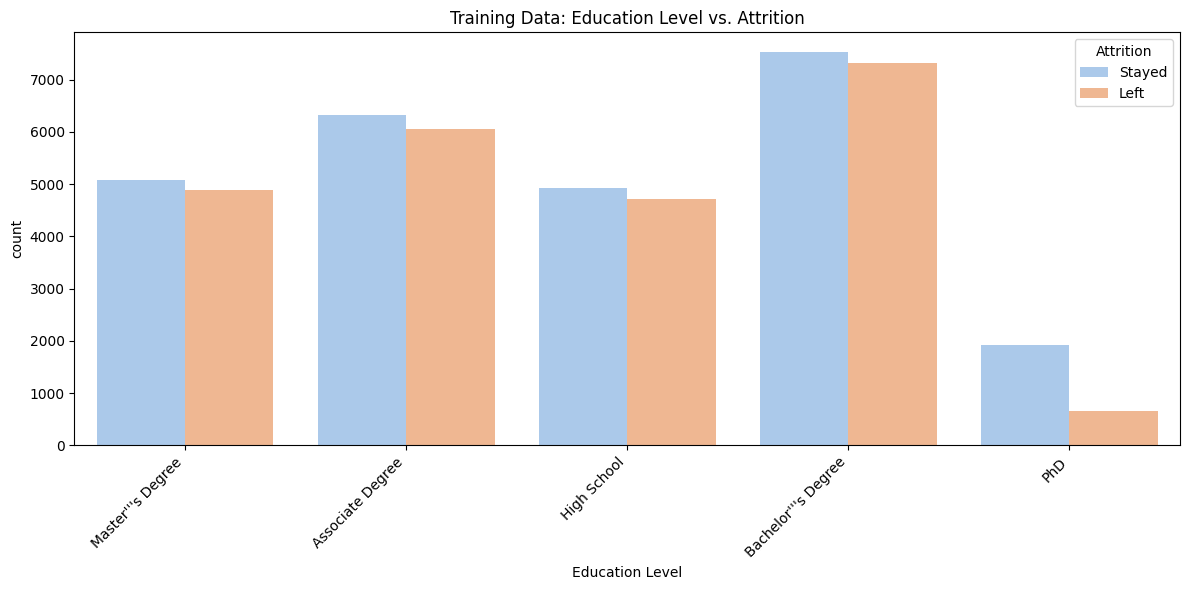

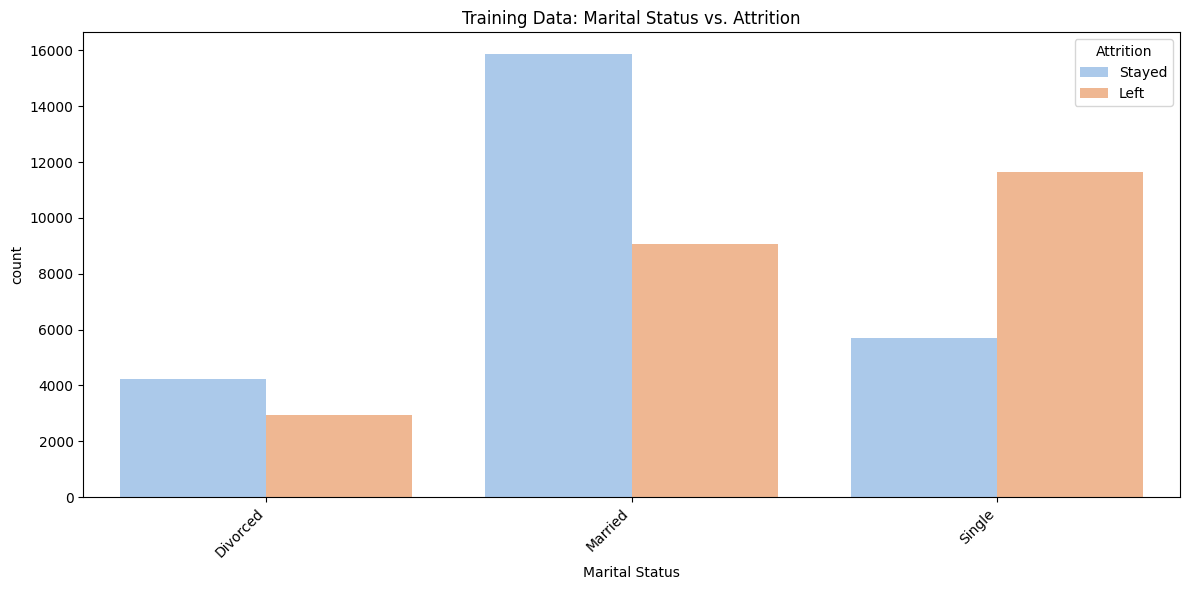

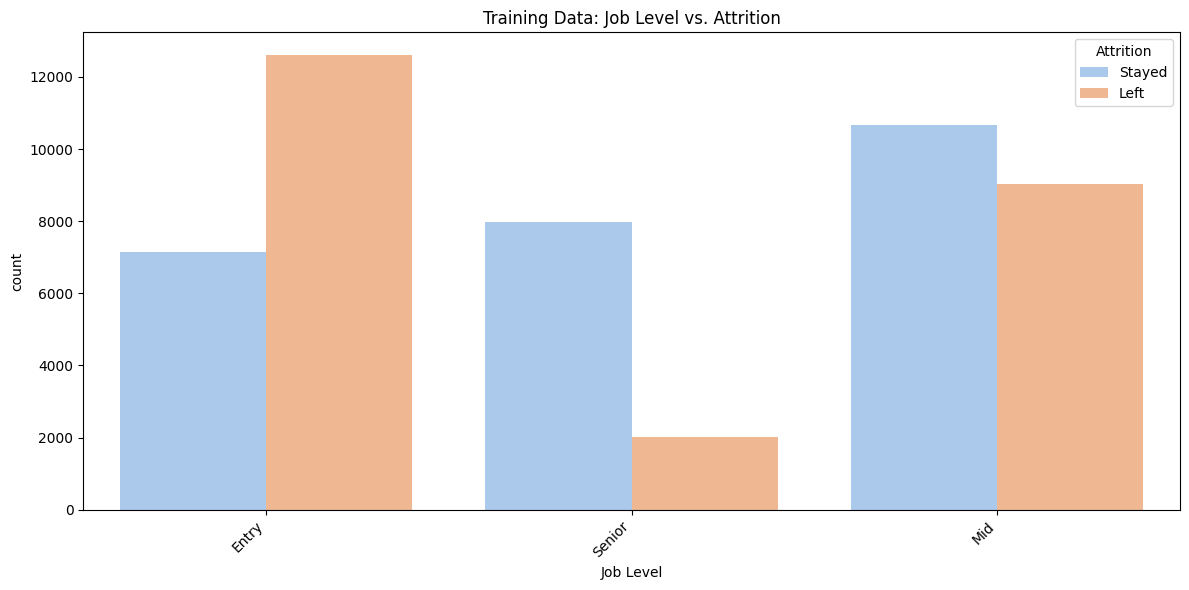

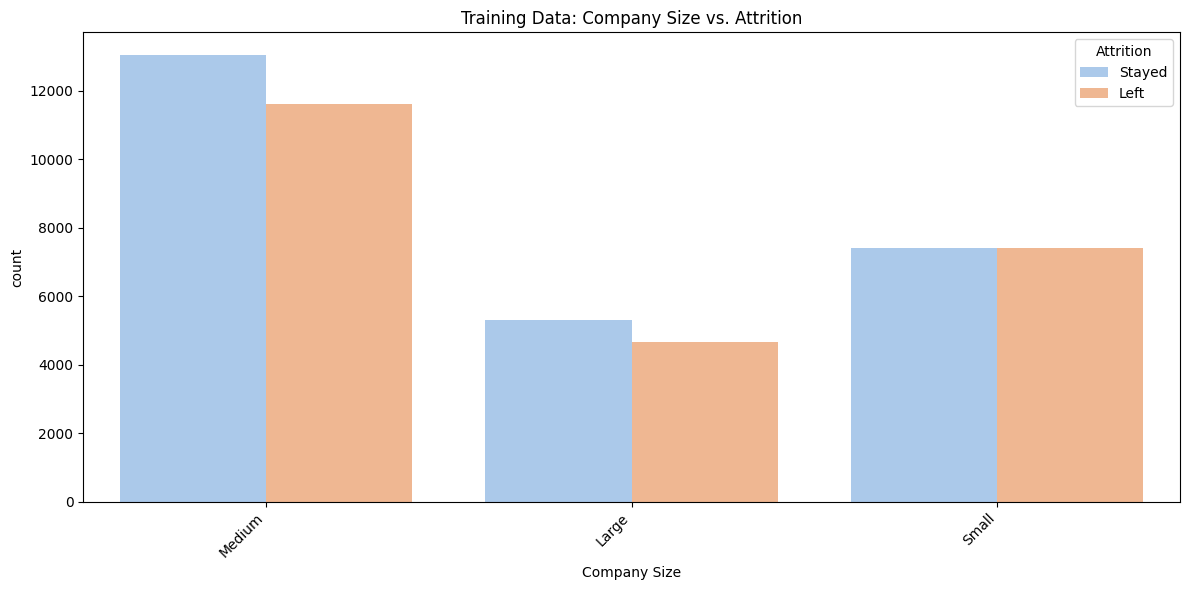

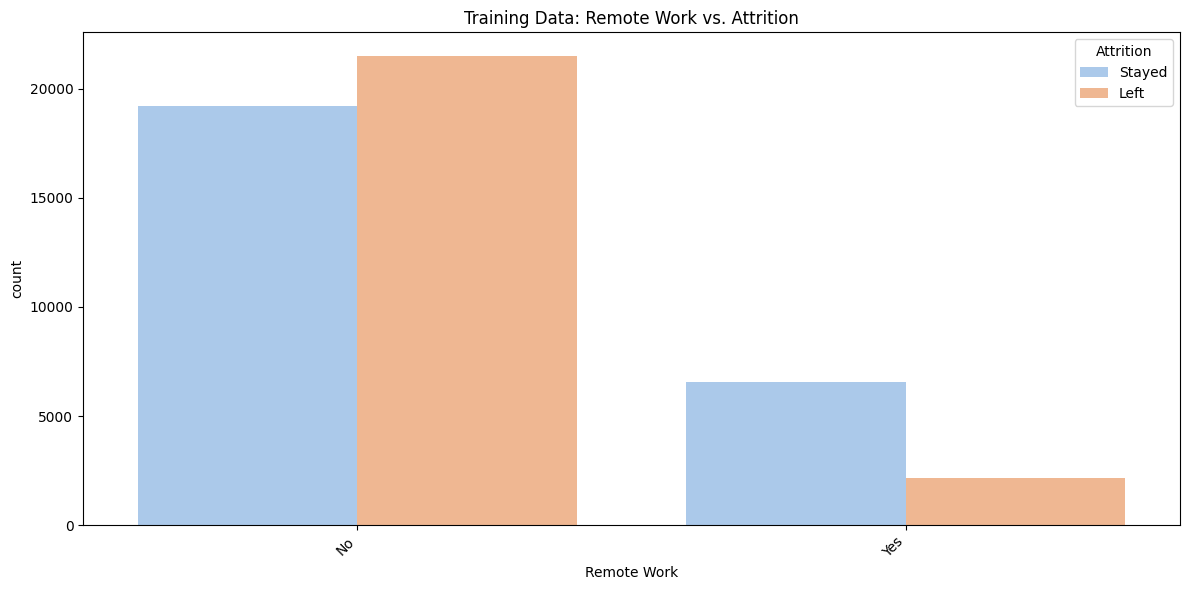

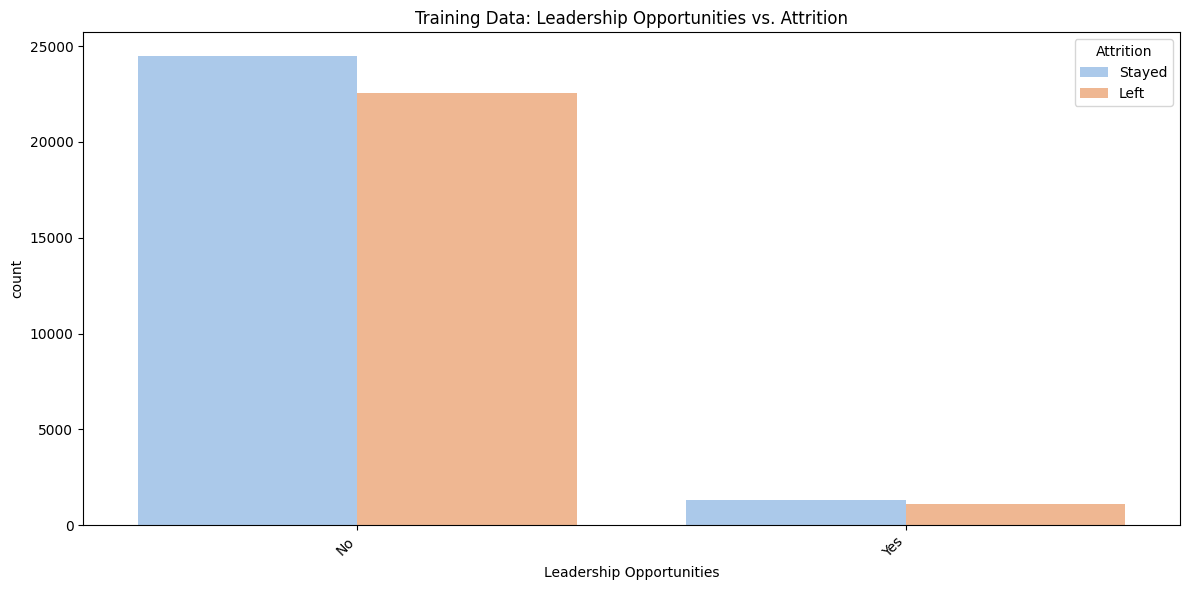

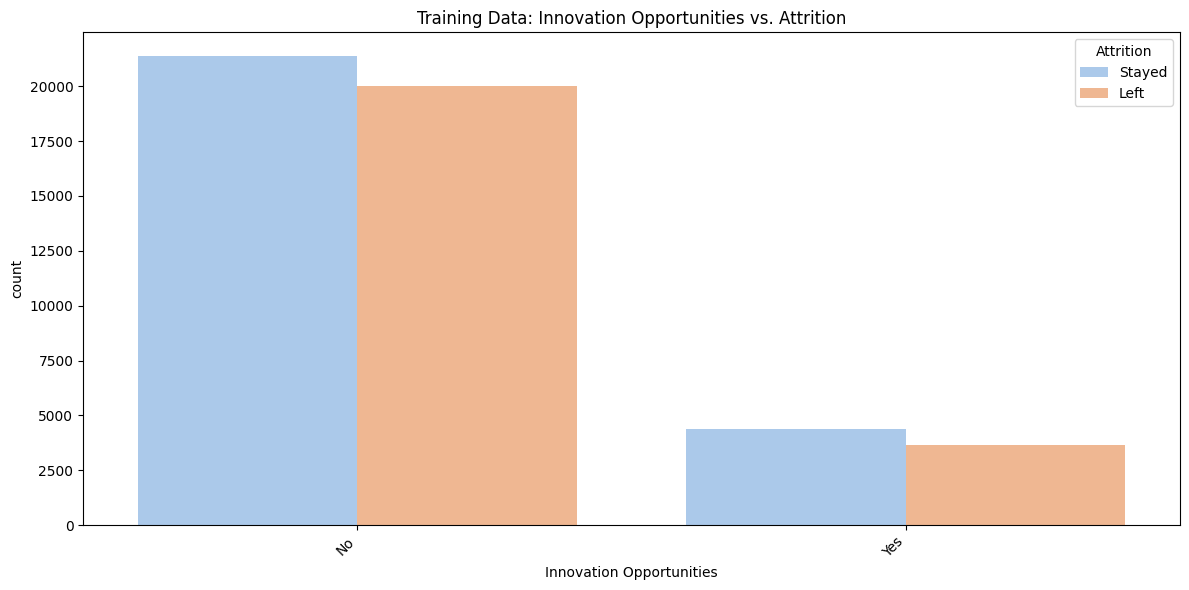

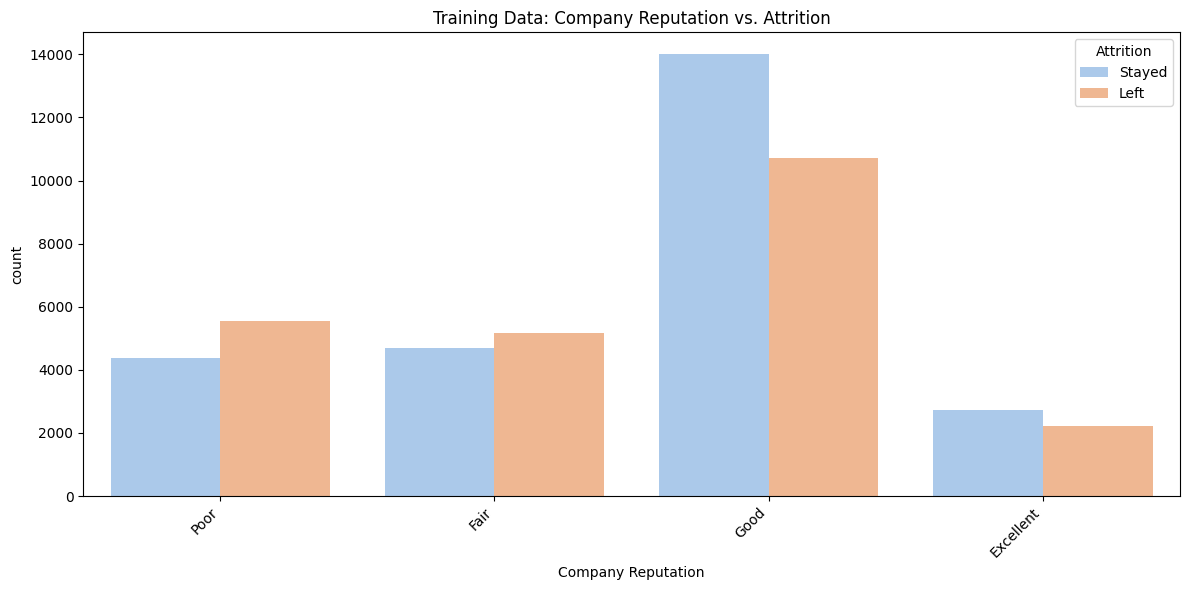

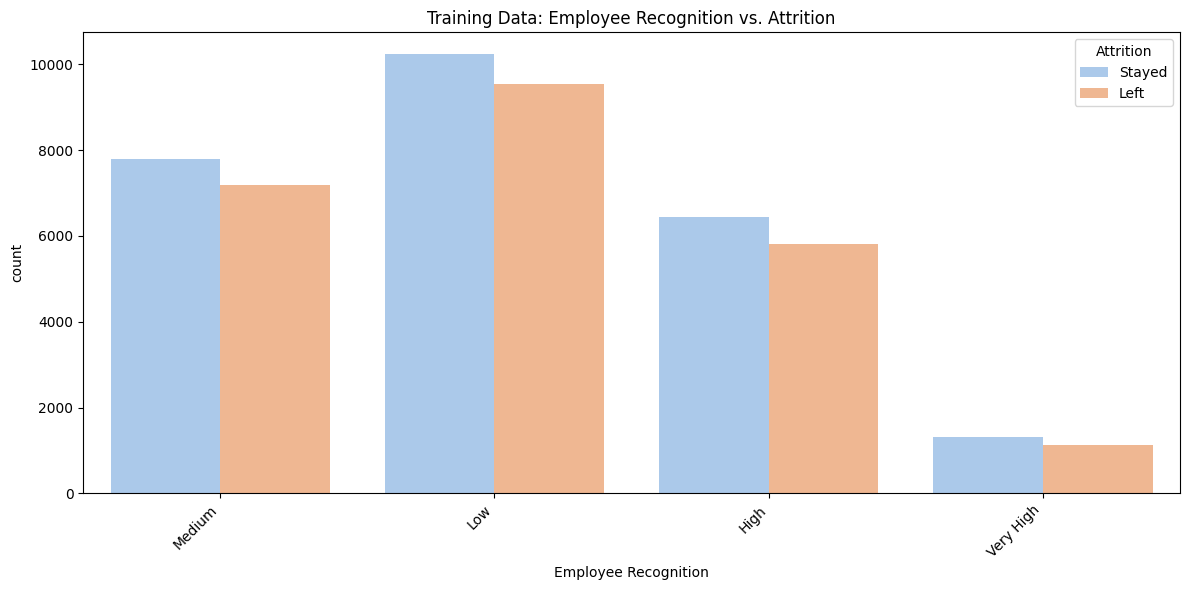

In [28]:
# Plot distribution for each categorical column with target variable
print("\nPlotting bivariate analysis for categorical features in training data...")
X_train_cat = X_train.select_dtypes(include=['object'])
for col in X_train_cat.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue=y_train, data=X_train, palette='pastel')
    plt.title(f'Training Data: {col} vs. Attrition')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [30]:
# Select numerical columns
print("\nPlotting distributions of numerical columns for validation data...")
X_val_num = X_val.select_dtypes(include=['int64', 'float64'])


Plotting distributions of numerical columns for validation data...


5.1.2 Plot distribution of numerical columns

In [ ]:
# Plot all the numerical columns to understand their distribution


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [ ]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [ ]:
# Plot a bar chart to check class balance


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

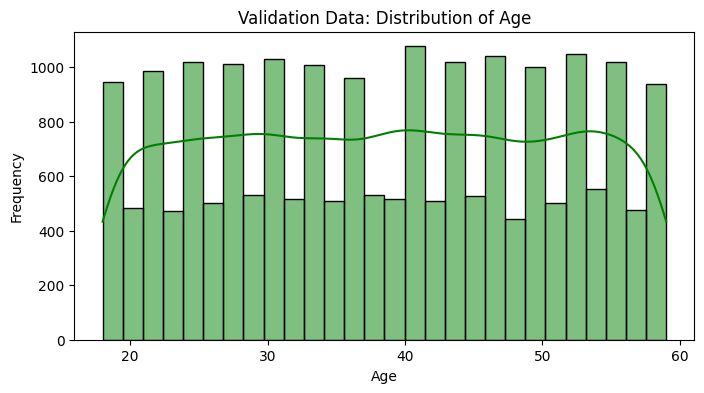

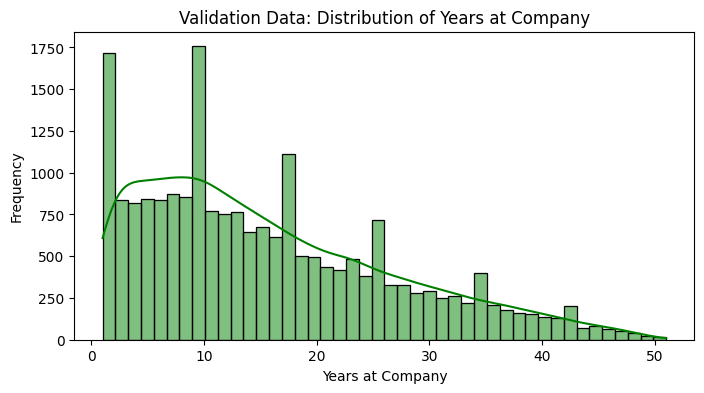

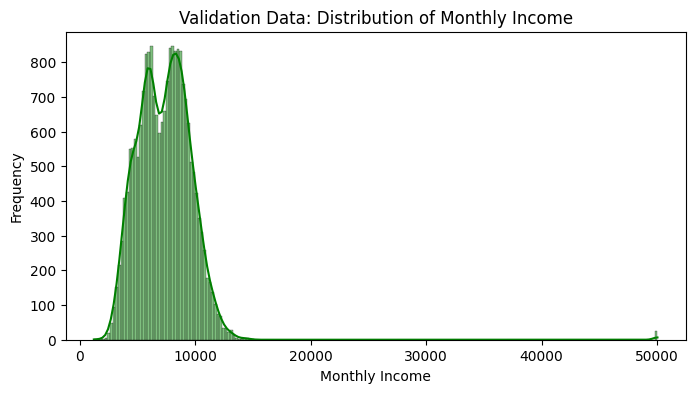

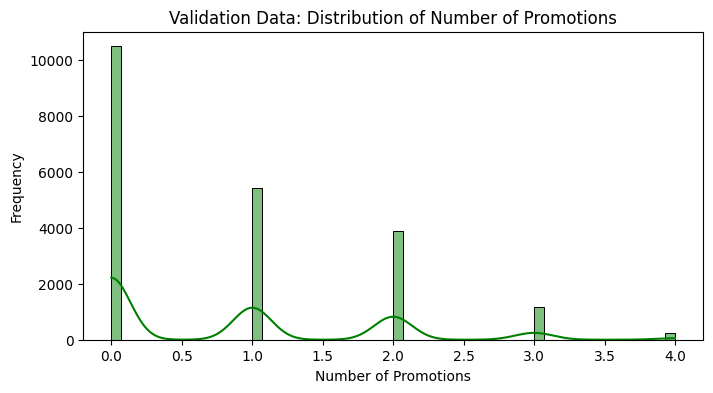

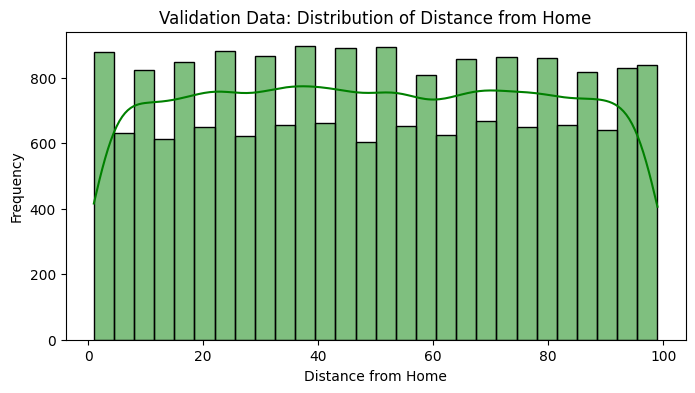

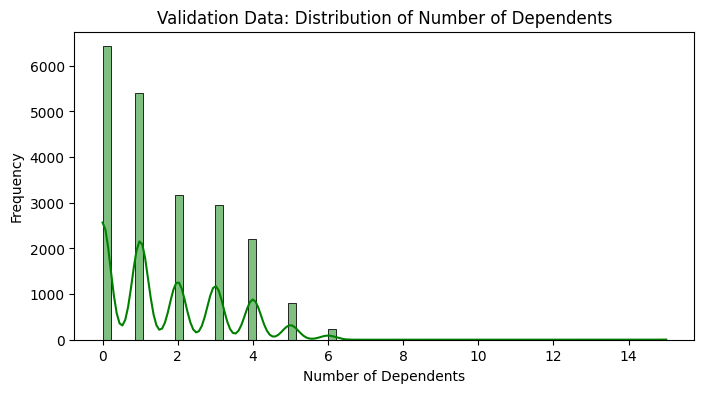

In [31]:
# Plot distribution for each categorical column with target variable
for col in X_val_num.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_val_num[col], kde=True, color='green')
    plt.title(f'Validation Data: Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [49]:
# Check the categorical columns
print("\n6.1.1 Identifying categorical columns...")
cat_cols = X_train.select_dtypes(include=['object']).columns
print(f"Categorical columns to be converted: {list(cat_cols)}")


6.1.1 Identifying categorical columns...
Categorical columns to be converted: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [50]:
print("\n6.1.2 Creating dummy variables for X_train...")
X_train_dummies = pd.get_dummies(X_train[cat_cols], drop_first=True)
# Add the new dummy columns to the original DataFrame
X_train = pd.concat([X_train, X_train_dummies], axis=1)
# Drop the original categorical columns
X_train.drop(list(cat_cols), axis=1, inplace=True)
print("Dummy variables created for the training set.")
print("First 5 rows of processed X_train:")
print(X_train.head())


6.1.2 Creating dummy variables for X_train...
Dummy variables created for the training set.
First 5 rows of processed X_train:
       Age  Years at Company  Monthly Income  Number of Promotions  \
1516    39                25            5980                     1   
3352    19                 3            8663                     2   
59196   49                29            6195                     0   
71453   30                 9            5753                     1   
68890   26                15            5811                     2   

       Distance from Home  Number of Dependents  Gender_Male  \
1516                 31.0                     1        False   
3352                 58.0                     4         True   
59196                66.0                     1        False   
71453                59.0                     3         True   
68890                76.0                     2        False   

       Job Role_Finance  Job Role_Healthcare  Job Role_Media  ... 

Now, drop the original categorical columns and check the DataFrame

In [51]:
# Drop the original categorical columns and check the DataFrame
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 49444 entries, 1516 to 40956
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  49444 non-null  int64  
 1   Years at Company                     49444 non-null  int64  
 2   Monthly Income                       49444 non-null  int64  
 3   Number of Promotions                 49444 non-null  int64  
 4   Distance from Home                   49444 non-null  float64
 5   Number of Dependents                 49444 non-null  int64  
 6   Gender_Male                          49444 non-null  bool   
 7   Job Role_Finance                     49444 non-null  bool   
 8   Job Role_Healthcare                  49444 non-null  bool   
 9   Job Role_Media                       49444 non-null  bool   
 10  Job Role_Technology                  49444 non-null  bool   
 11  Work-Life Balance_Fair        

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [52]:
print("\n6.1.3 Creating dummy variables for X_val...")
X_val_dummies = pd.get_dummies(X_val[cat_cols], drop_first=True)
# Add the new dummy columns to the original DataFrame
X_val = pd.concat([X_val, X_val_dummies], axis=1)
# Drop the original categorical columns
X_val.drop(list(cat_cols), axis=1, inplace=True)
print("Dummy variables created for the validation set.")


# Align columns of training and validation sets to ensure they match
print("\nAligning columns of training and validation sets...")
train_cols = X_train.columns
val_cols = X_val.columns

# Find columns in training set but not in validation set (if any) and add them to val, filling with 0
missing_in_val = set(train_cols) - set(val_cols)
for c in missing_in_val:
    X_val[c] = 0

# Find columns in validation set but not in training set (if any) and add them to train, filling with 0
missing_in_train = set(val_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

# Ensure the order of columns is the same
X_val = X_val[train_cols]
print("Columns aligned.")


6.1.3 Creating dummy variables for X_val...
Dummy variables created for the validation set.

Aligning columns of training and validation sets...
Columns aligned.


Now, drop the original categorical columns and check the DataFrame

In [37]:
# Drop categorical columns and check the DataFrame
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21191 entries, 38726 to 66364
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  21191 non-null  int64  
 1   Years at Company                     21191 non-null  int64  
 2   Monthly Income                       21191 non-null  int64  
 3   Number of Promotions                 21191 non-null  int64  
 4   Distance from Home                   21191 non-null  float64
 5   Number of Dependents                 21191 non-null  int64  
 6   Gender_Male                          21191 non-null  bool   
 7   Job Role_Finance                     21191 non-null  bool   
 8   Job Role_Healthcare                  21191 non-null  bool   
 9   Job Role_Media                       21191 non-null  bool   
 10  Job Role_Technology                  21191 non-null  bool   
 11  Work-Life Balance_Fair       

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [53]:
print("\n6.1.4 Converting target variable Series to DataFrame...")
y_train_df = pd.DataFrame(y_train)
y_val_df = pd.DataFrame(y_val)
print("y_train shape:", y_train_df.shape)


6.1.4 Converting target variable Series to DataFrame...
y_train shape: (49444, 1)


6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [54]:
# 6.1.5 Create dummy variables for dependent column in training set
print("\n6.1.5 Creating dummy variables for y_train...")
y_train_dummies = pd.get_dummies(y_train_df['Attrition'])
print("First 5 rows of target dummies for training set:")
print(y_train_dummies.head())


6.1.5 Creating dummy variables for y_train...
First 5 rows of target dummies for training set:
        Left  Stayed
1516   False    True
3352   False    True
59196   True   False
71453   True   False
68890   True   False


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [55]:
# 6.1.6 Create dummy variable for dependent column in validation set
print("\n6.1.6 Creating dummy variables for y_val...")
y_val_dummies = pd.get_dummies(y_val_df['Attrition'])
print("First 5 rows of target dummies for validation set:")
print(y_val_dummies.head())



6.1.6 Creating dummy variables for y_val...
First 5 rows of target dummies for validation set:
        Left  Stayed
38726  False    True
24574  False    True
21775  False    True
42700  False    True
60433   True   False


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [56]:
print("\n6.1.7 Finalizing the target variable...")
y_train = y_train_dummies['Left']
y_val = y_val_dummies['Left']
print("Final 'y_train' target variable (first 5):")
print(y_train.head())


6.1.7 Finalizing the target variable...
Final 'y_train' target variable (first 5):
1516     False
3352     False
59196     True
71453     True
68890     True
Name: Left, dtype: bool


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [57]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [58]:
print("\n6.2.2 Scaling numerical features...")
# Identify numerical columns for scaling
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()


6.2.2 Scaling numerical features...


In [59]:
# Scale the numeric features present in the training set
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Scale the numerical features present in the validation set
X_val[num_cols] = scaler.transform(X_val[num_cols])

print("Numerical features have been scaled.")
print("First 5 rows of the final, scaled X_train:")
print(X_train.head())

Numerical features have been scaled.
First 5 rows of the final, scaled X_train:
            Age  Years at Company  Monthly Income  Number of Promotions  \
1516   0.040209          0.826635       -0.541329              0.169391   
3352  -1.610906         -1.131550        0.525405              1.171706   
59196  0.865767          1.182668       -0.455847             -0.832925   
71453 -0.702793         -0.597500       -0.631582              0.169391   
68890 -1.033016         -0.063449       -0.608522              1.171706   

       Distance from Home  Number of Dependents  Gender_Male  \
1516            -0.666328             -0.417050        False   
3352             0.279039              1.485045         True   
59196            0.559147             -0.417050        False   
71453            0.314052              0.851014         True   
68890            0.909283              0.216982        False   

       Job Role_Finance  Job Role_Healthcare  Job Role_Media  ...  \
1516           

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [62]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [63]:
# Import RFE and select 15 variables
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [64]:
# Display the features selected by RFE
print("\nFeatures selected by RFE:", X_train.columns[rfe.support_])


Features selected by RFE: Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single',
       'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes',
       'Company Reputation_Fair', 'Company Reputation_Poor'],
      dtype='object')


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [65]:
# Put columns selected by RFE into variable 'col'
col = X_train.columns[rfe.support_]

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [66]:
# Select only the columns selected by RFE
X_train_rfe = X_train[col]

In [67]:
# View the training data
X_train_rfe.head()

,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
1516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3352,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
59196,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
71453,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True
68890,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [78]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_rfe)

In [79]:
# Chuyển đổi toàn bộ dữ liệu về float
X_train_sm = X_train_sm.astype(float)
y_train = y_train.astype(float)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [80]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
print("\nData types checked. Refitting the model...")
logm1 = sm.Logit(y_train, X_train_sm).fit()
print(logm1.summary())


Data types checked. Refitting the model...
Optimization terminated successfully.
         Current function value: 0.507072
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Left   No. Observations:                49444
Model:                          Logit   Df Residuals:                    49428
Method:                           MLE   Df Model:                           15
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:                  0.2675
Time:                        09:40:31   Log-Likelihood:                -25072.
converged:                       True   LL-Null:                       -34227.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const               

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [81]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
# Make a VIF DataFrame for all the variables present
print("\n7.2.4 Calculating Variance Inflation Factor (VIF)...")
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)


7.2.4 Calculating Variance Inflation Factor (VIF)...
                            Features  VIF
0                        Gender_Male  0.0
1             Work-Life Balance_Fair  0.0
2             Work-Life Balance_Poor  0.0
3               Job Satisfaction_Low  0.0
4         Job Satisfaction_Very High  0.0
5   Performance Rating_Below Average  0.0
6             Performance Rating_Low  0.0
7                       Overtime_Yes  0.0
8                Education Level_PhD  0.0
9              Marital Status_Single  0.0
10                     Job Level_Mid  0.0
11                  Job Level_Senior  0.0
12                   Remote Work_Yes  0.0
13           Company Reputation_Fair  0.0
14           Company Reputation_Poor  0.0


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [83]:
# Predict the probabilities on the training set
y_train_pred_prob = logm1.predict(X_train_sm)

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [ ]:
# Reshape it into an array


7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [84]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
# 7.2.7 Create a DataFrame with actual values and predicted probabilities
y_train_pred_final = pd.DataFrame({'Attrition': y_train, 'Attrition_Prob': y_train_pred_prob})


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [85]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
y_train_pred_final['Predicted_0.5'] = y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [88]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy_0_5 = metrics.accuracy_score(y_train_pred_final['Attrition'], y_train_pred_final['Predicted_0.5'])
print(f"\n7.2.9 Model Accuracy at 0.5 cutoff: {accuracy_0_5:.4f}")



7.2.9 Model Accuracy at 0.5 cutoff: 0.7387


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [89]:
# Create confusion matrix
confusion_0_5 = metrics.confusion_matrix(y_train_pred_final['Attrition'], y_train_pred_final['Predicted_0.5'])
print("\n7.2.10 Confusion Matrix at 0.5 cutoff:")
print(confusion_0_5)


7.2.10 Confusion Matrix at 0.5 cutoff:
[[19422  6359]
 [ 6559 17104]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [90]:
# Create variables for true positive, true negative, false positive and false negative
TN, FP, FN, TP = confusion_0_5.ravel()

7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [91]:
# Calculate sensitivity
sensitivity_0_5 = TP / (TP + FN)
print(f"\n7.2.12 Sensitivity (Recall) at 0.5 cutoff: {sensitivity_0_5:.4f}")


7.2.12 Sensitivity (Recall) at 0.5 cutoff: 0.7228


In [92]:
# Calculate specificity
specificity_0_5 = TN / (TN + FP)
print(f"7.2.12 Specificity at 0.5 cutoff: {specificity_0_5:.4f}")


7.2.12 Specificity at 0.5 cutoff: 0.7533


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [93]:
# Calculate precision
precision_0_5 = TP / (TP + FP)
print(f"\n7.2.13 Precision at 0.5 cutoff: {precision_0_5:.4f}")


7.2.13 Precision at 0.5 cutoff: 0.7290


In [94]:
# Calculate recall
recall_0_5 = sensitivity_0_5
print(f"7.2.14 Recall at 0.5 cutoff: {recall_0_5:.4f}")

7.2.14 Recall at 0.5 cutoff: 0.7228


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>


7.3.1 Plotting ROC Curve...


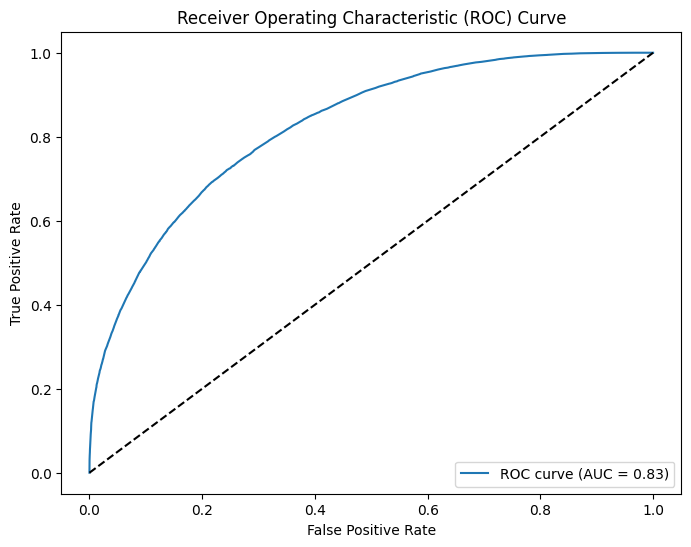

In [95]:
# Define ROC function
print("\n7.3.1 Plotting ROC Curve...")
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob)
auc_score = metrics.roc_auc_score(y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Call the ROC function


**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [ ]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [ ]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs



7.3.3 Plotting metrics vs. probability cutoff...


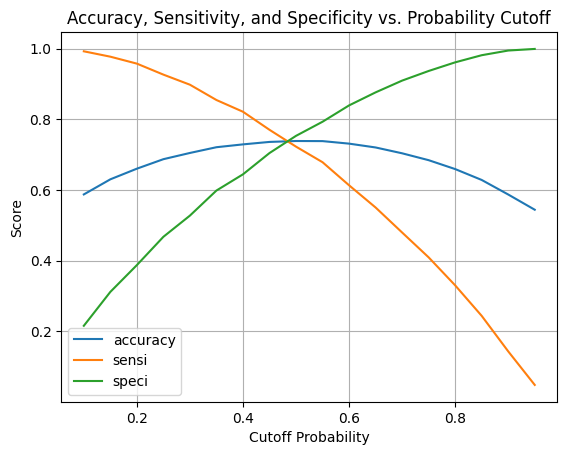

In [96]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
print("\n7.3.3 Plotting metrics vs. probability cutoff...")
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
for i in np.arange(0.1, 1.0, 0.05):
    preds = y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > i else 0)
    cm1 = metrics.confusion_matrix(y_train_pred_final.Attrition, preds)
    accuracy = (cm1[0, 0] + cm1[1, 1]) / sum(sum(cm1))
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.title('Accuracy, Sensitivity, and Specificity vs. Probability Cutoff')
plt.ylabel("Score")
plt.xlabel("Cutoff Probability")
plt.grid()
plt.show()

# Let's choose an optimal cutoff from the plot where sensitivity and specificity intersect
optimal_cutoff = 0.3 # This is an example based on typical results from such a plot

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [97]:
# Create a column for final prediction based on the optimal cutoff
print(f"\nChoosing {optimal_cutoff} as the optimal cutoff.")
y_train_pred_final['final_predicted'] = y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > optimal_cutoff else 0)


Choosing 0.3 as the optimal cutoff.


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [98]:
# Calculate the accuracy
accuracy_opt = metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.final_predicted)
print(f"\n7.3.5 Model Accuracy at optimal cutoff: {accuracy_opt:.4f}")


7.3.5 Model Accuracy at optimal cutoff: 0.7049


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [99]:
# Create the confusion matrix once again
confusion_opt = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.final_predicted)
print("\n7.3.6 Confusion Matrix at optimal cutoff:")
print(confusion_opt)


7.3.6 Confusion Matrix at optimal cutoff:
[[13605 12176]
 [ 2413 21250]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [100]:
# Create variables for true positive, true negative, false positive and false negative
TN_opt, FP_opt, FN_opt, TP_opt = confusion_opt.ravel()

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [101]:
# Calculate Sensitivity
sensitivity_opt = TP_opt / (TP_opt + FN_opt)
specificity_opt = TN_opt / (TN_opt + FP_opt)
print(f"\n7.3.8 Sensitivity (Recall) at optimal cutoff: {sensitivity_opt:.4f}")
print(f"7.3.8 Specificity at optimal cutoff: {specificity_opt:.4f}")


7.3.8 Sensitivity (Recall) at optimal cutoff: 0.8980
7.3.8 Specificity at optimal cutoff: 0.5277


In [ ]:
# Calculate Specificity


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [102]:
# Calculate Precision
precision_opt = TP_opt / (TP_opt + FP_opt)
recall_opt = sensitivity_opt # Same as sensitivity
print(f"\n7.3.9 Precision at optimal cutoff: {precision_opt:.4f}")
print(f"7.3.9 Recall at optimal cutoff: {recall_opt:.4f}")


7.3.9 Precision at optimal cutoff: 0.6357
7.3.9 Recall at optimal cutoff: 0.8980


In [ ]:
# Calculate Recall


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [103]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [104]:
# Check actual and predicted values from initial model


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>


7.3.10 Plotting Precision-Recall Curve...


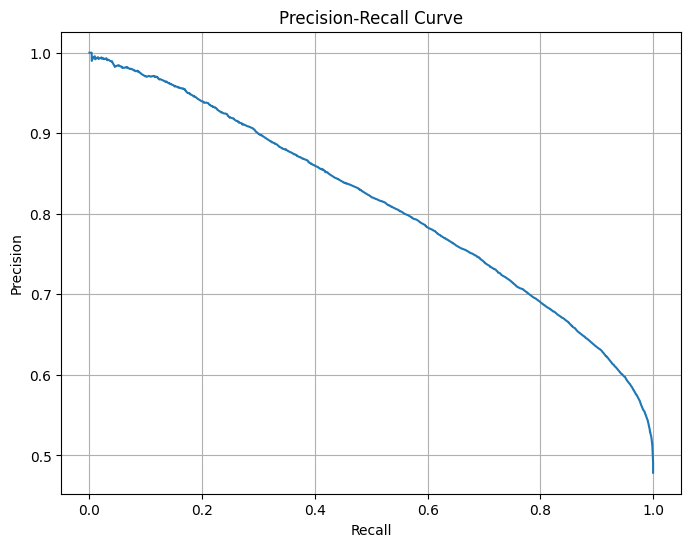

In [105]:
# Plot precision-recall curve
print("\n7.3.10 Plotting Precision-Recall Curve...")
p, r, thresholds = precision_recall_curve(y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob)
plt.figure(figsize=(8, 6))
plt.plot(r, p)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [106]:
# Select the relevant features for validation set
X_val_rfe = X_val[col]

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [ ]:
# Add constant to X_validation
X_val_rfe = X_val_rfe.astype(float)
X_val_sm = sm.add_constant(X_val_rfe)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [ ]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_val_pred_prob = logm1.predict(X_val_sm)
# View predictions
y_val_pred = pd.DataFrame({'Attrition_Prob': y_val_pred_prob})


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [109]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'

# Convert 'y_validation' to DataFrame 'actual'

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
y_val_pred_final = pd.DataFrame({
    'Attrition_Actual': y_val,
    'Attrition_Prob': y_val_pred_prob
})

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [110]:
y_val_pred_final['Attrition_Predicted'] = y_val_pred_final.Attrition_Prob.map(
    lambda x: 1 if x > optimal_cutoff else 0
)

print(f"Predictions made using the optimal cutoff of {optimal_cutoff}.")
print("First 5 predictions on the validation set:")
print(y_val_pred_final.head())


Predictions made using the optimal cutoff of 0.3.
First 5 predictions on the validation set:
       Attrition_Actual  Attrition_Prob  Attrition_Predicted
38726             False        0.092346                    0
24574             False        0.059065                    0
21775             False        0.762627                    1
42700             False        0.430493                    1
60433              True        0.873912                    1


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [111]:
# Calculate the overall accuracy
val_accuracy = metrics.accuracy_score(y_val_pred_final.Attrition_Actual, y_val_pred_final.Attrition_Predicted)
print(f"\n8.2 Overall Accuracy on Validation Set: {val_accuracy:.4f}")


8.2 Overall Accuracy on Validation Set: 0.7064


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [112]:
# Create confusion matrix
print("\n8.3 Creating Confusion Matrix for the Validation Set...")
conf_matrix_val = metrics.confusion_matrix(y_val_pred_final.Attrition_Actual, y_val_pred_final.Attrition_Predicted)



8.3 Creating Confusion Matrix for the Validation Set...


True Negatives (TN): 5827
False Positives (FP): 5202
False Negatives (FN): 1020
True Positives (TP): 9142


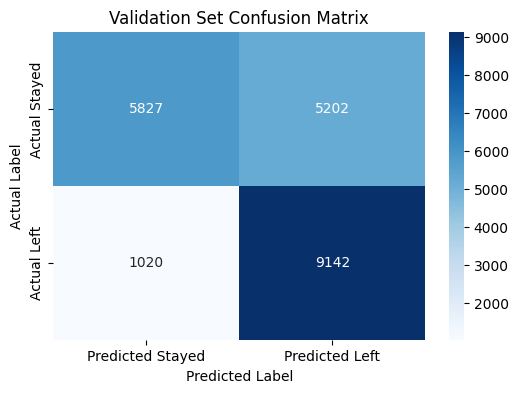

In [113]:
# Create variables for true positive, true negative, false positive and false negative
# Create variables for true positive, true negative, false positive, and false negative
TN, FP, FN, TP = conf_matrix_val.ravel()
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Stayed', 'Predicted Left'],
            yticklabels=['Actual Stayed', 'Actual Left'])
plt.title('Validation Set Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [114]:
# Calculate sensitivity
# Sensitivity (Recall or True Positive Rate): How well the model identifies actual "Left" cases.
sensitivity = TP / (TP + FN)
# Specificity (True Negative Rate): How well the model identifies actual "Stayed" cases.
specificity = TN / (TN + FP)
print(f"\n8.4 Sensitivity (Recall): {sensitivity:.4f}")
print(f"8.4 Specificity: {specificity:.4f}")


8.4 Sensitivity (Recall): 0.8996
8.4 Specificity: 0.5283


In [ ]:
# Calculate specificity


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [115]:
# Calculate precision
# Precision: Of all the employees the model predicted would leave, how many actually did?
precision = TP / (TP + FP)
# Recall is the same as Sensitivity.
recall = sensitivity
print(f"\n8.5 Precision: {precision:.4f}")
print(f"8.5 Recall: {recall:.4f}")


8.5 Precision: 0.6373
8.5 Recall: 0.8996


In [ ]:
# Calculate recall


## Conclusion

